# P1 & P2 & P3

----------------P3 z-score norm-----------------------
-----------------MLE final----------------------------


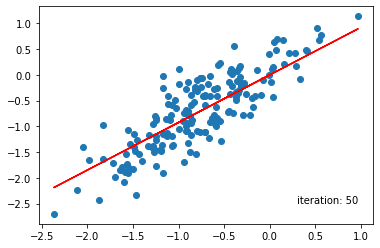

-----------------gradient ----------------------------


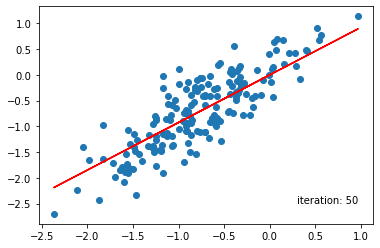

---------------P3 min-max norm-------------------------
-----------------MLE final----------------------------


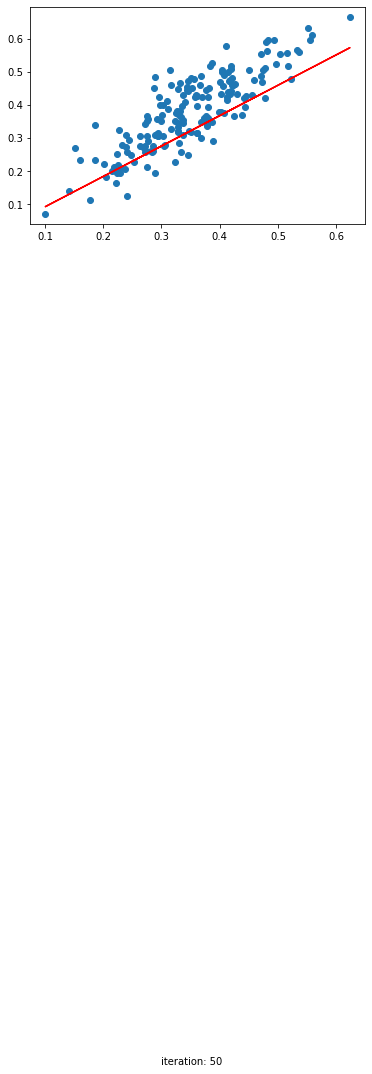

-----------------gradient ----------------------------


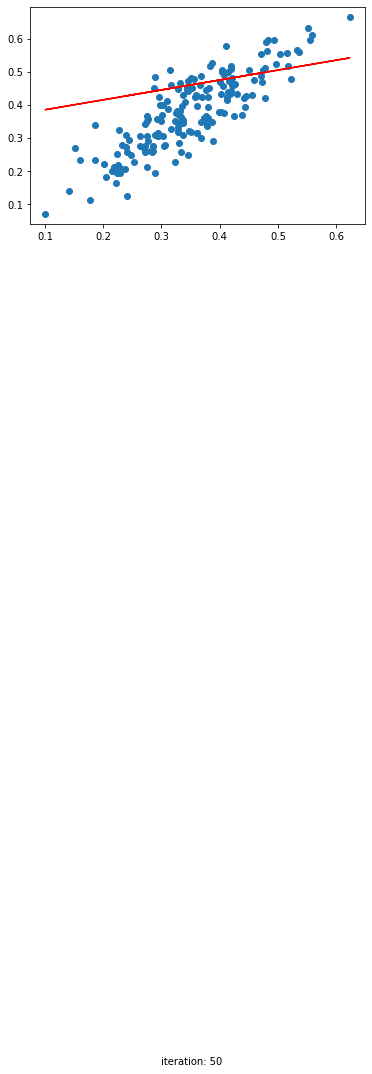

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


class LinearRegression:
    def fit(self,X,Y,Test):
        X_test, Y_test = Test[0], Test[1]
        X=np.array(X).reshape(1,-1)
        Y=np.array(Y).reshape(1,-1)
        x_shape = X.shape
        num_var = x_shape[0]
        self.parameter_cache = []
        self.weight = np.random.normal(0,1,(num_var,1))
        self.bias = np.random.rand(1)
        self.num_iteration = 51       
      
        for t in range(self.num_iteration):
            N = x_shape[1]
            self.delta_W = 2/N*(np.sum(np.multiply(((np.matmul(self.weight,X) + self.bias)-Y),X)))
            self.delta_bias = 2/N*(np.sum(((np.matmul(self.weight,X)+self.bias)-Y)))
            self.weight -= 0.1*self.delta_W
            self.bias -= 0.1*self.delta_bias
            
#             if t % 10 == 0:

            if t == 50:
                pred = self.predict(np.array(X_test))
                
                plt.scatter(X_test,Y_test)
                plt.plot(X_test,pred,'red')
                plt.text(0.3, -2.5, 'iteration: {}'.format(t), fontsize=10)
                plt.show()
                
            #self.parameter_cache.append(np.array((self.weight,self.bias)))
#                 print("--------------------------weight--------------------------")    
#                 print(self.weight)
        return self.weight,self.bias,self.parameter_cache
    
    def predict(self,X):
        #print(X.shape)
        product = np.matmul(self.weight, np.array(X).reshape(1,-1))+self.bias
        return product.reshape(-1)



class MLE_LinearRegression:
    
    def __init__(self,):
        self.weight = np.random.normal(0,1,(1,1))
        self.bias = np.random.rand(1)
        self.parameter_cache = []
        self.num_iteration = 151
          
        
    def fit(self, X, Y, Test):
        X_test, Y_test = Test[0], Test[1]
        X=np.array(X).reshape(1,-1)
        Y=np.array(Y).reshape(1,-1)
        x_shape = X.shape
        num_var = x_shape[0]
        
        
        self.weight = np.cov(X,Y)[0,1] / np.var(X)
        self.bias = np.mean(Y) - self.weight*np.mean(X)   

        for t in range(self.num_iteration):           

            if t == 50:
                pred = self.predict(np.array(X_test))
                
                plt.scatter(X_test,Y_test)
                plt.plot(X_test,pred,'red')
                plt.text(0.3, -2.5, 'iteration: {}'.format(t), fontsize=10)
                plt.show()
#                 print("--------------------------weight--------------------------")    
#                 print(self.weight)
        return self.weight, self.bias

                    
    def predict(self,X):
        #print(X.shape)
        product = self.weight * np.array(X)
        return product.reshape(-1)


if __name__ == "__main__":
    
    data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
    
    
#     x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
#     y = (data["Height"]-data['Height'].mean())/data["Height"].std()   
    
#     MLE_reg = MLE_LinearRegression()
#     reg = LinearRegression()
    
#     print("-----------------MLE final----------------------------")
    
#     MLE_reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
#     MLE_pred = MLE_reg.predict(np.array(x[-180:]))
    
#     print("-----------------gradient ----------------------------")
    
#     reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
#     reg.predict(np.array(x[-180:]))
    
    
    print("----------------P3 z-score norm-----------------------")
    
    x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
    y = (data["Height"]-data['Height'].mean())/data["Height"].std()   
    
    MLE_reg = MLE_LinearRegression()
    reg = LinearRegression()
    
    print("-----------------MLE final----------------------------")
    
    MLE_reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
    MLE_pred = MLE_reg.predict(np.array(x[-180:]))
    
    print("-----------------gradient ----------------------------")
    
    reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
    reg.predict(np.array(x[-180:]))
    
    
    
    print("---------------P3 min-max norm-------------------------")
    
    data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
    
    x = (data['Weight']-min(data['Weight'])) / ( max(data['Weight']) - min(data['Weight']) )
    y = (data["Height"]-min(data['Height'])) / ( max(data['Height']) - min(data['Height']) )
    
    print("-----------------MLE final----------------------------")
    
    MLE_reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
    MLE_pred = MLE_reg.predict(np.array(x[-180:]))
    
    print("-----------------gradient ----------------------------")
    
    reg.fit( x[:-180],y[:-180], [x[-180:],y[-180:]] )
    reg.predict(np.array(x[-180:]))
    
   